In [341]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

from collections import Counter

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [342]:
data = pd.read_csv("C://Users/Johail/Downloads/weatherHistory.csv")
data = data.drop(["date","daily_report"], axis=1)
y= data['app_temp']
report_data= data.tail(4000)
report_data.head()

,week_repo,precip_type,temp,app_temp,humid,wind_speed,wind_dir,visib,cld_cover,pres
92453,Partly_Cloudy,rain,27.633333,30.161111,0.72,3.3488,37,14.7315,0,1019.15
92454,Partly_Cloudy,rain,29.905556,32.600000,0.60,8.0178,107,15.1340,0,1019.12
92455,Partly_Cloudy,rain,32.083333,35.233333,0.53,13.7011,138,15.1340,0,1019.09
92456,Partly_Cloudy,rain,32.633333,36.394444,0.53,12.3487,140,10.3523,0,1018.96
92457,Partly_Cloudy,rain,33.650000,35.888889,0.44,15.2789,151,15.3111,0,1018.49


In [343]:
report_data.describe()

,temp,app_temp,humid,wind_speed,wind_dir,visib,cld_cover,pres
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000
mean,12.297360,11.398488,0.755380,10.213788,179.960250,11.110457,0.0,1015.095382
std,7.261785,8.134063,0.174981,5.737446,104.378733,4.563469,0.0,39.803203
min,-2.450000,-6.138889,0.240000,0.000000,0.000000,0.000000,0.0,0.000000
25%,6.683333,4.637500,0.660000,6.198500,121.000000,8.915375,0.0,1013.800000
50%,11.061111,11.061111,0.800000,9.595600,169.000000,10.352300,0.0,1017.515000
75%,17.156944,17.156944,0.890000,13.346900,272.000000,15.552600,0.0,1019.560000
max,34.594444,37.005556,1.000000,38.833200,359.000000,16.100000,0.0,1034.500000


In [344]:
report_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 92453 to 96452
Data columns (total 10 columns):
week_repo      4000 non-null object
precip_type    3626 non-null object
temp           4000 non-null float64
app_temp       4000 non-null float64
humid          4000 non-null float64
wind_speed     4000 non-null float64
wind_dir       4000 non-null int64
visib          4000 non-null float64
cld_cover      4000 non-null int64
pres           4000 non-null float64
dtypes: float64(6), int64(2), object(2)
memory usage: 312.6+ KB


In [345]:
report_data = pd.get_dummies(report_data, columns=['week_repo',"precip_type"], drop_first=True)
report_data.head()
y_repo= report_data["app_temp"]
data = pd.get_dummies(data, columns=['week_repo',"precip_type"], drop_first=True)

# Plotting For Variables to indicate a corrreleation

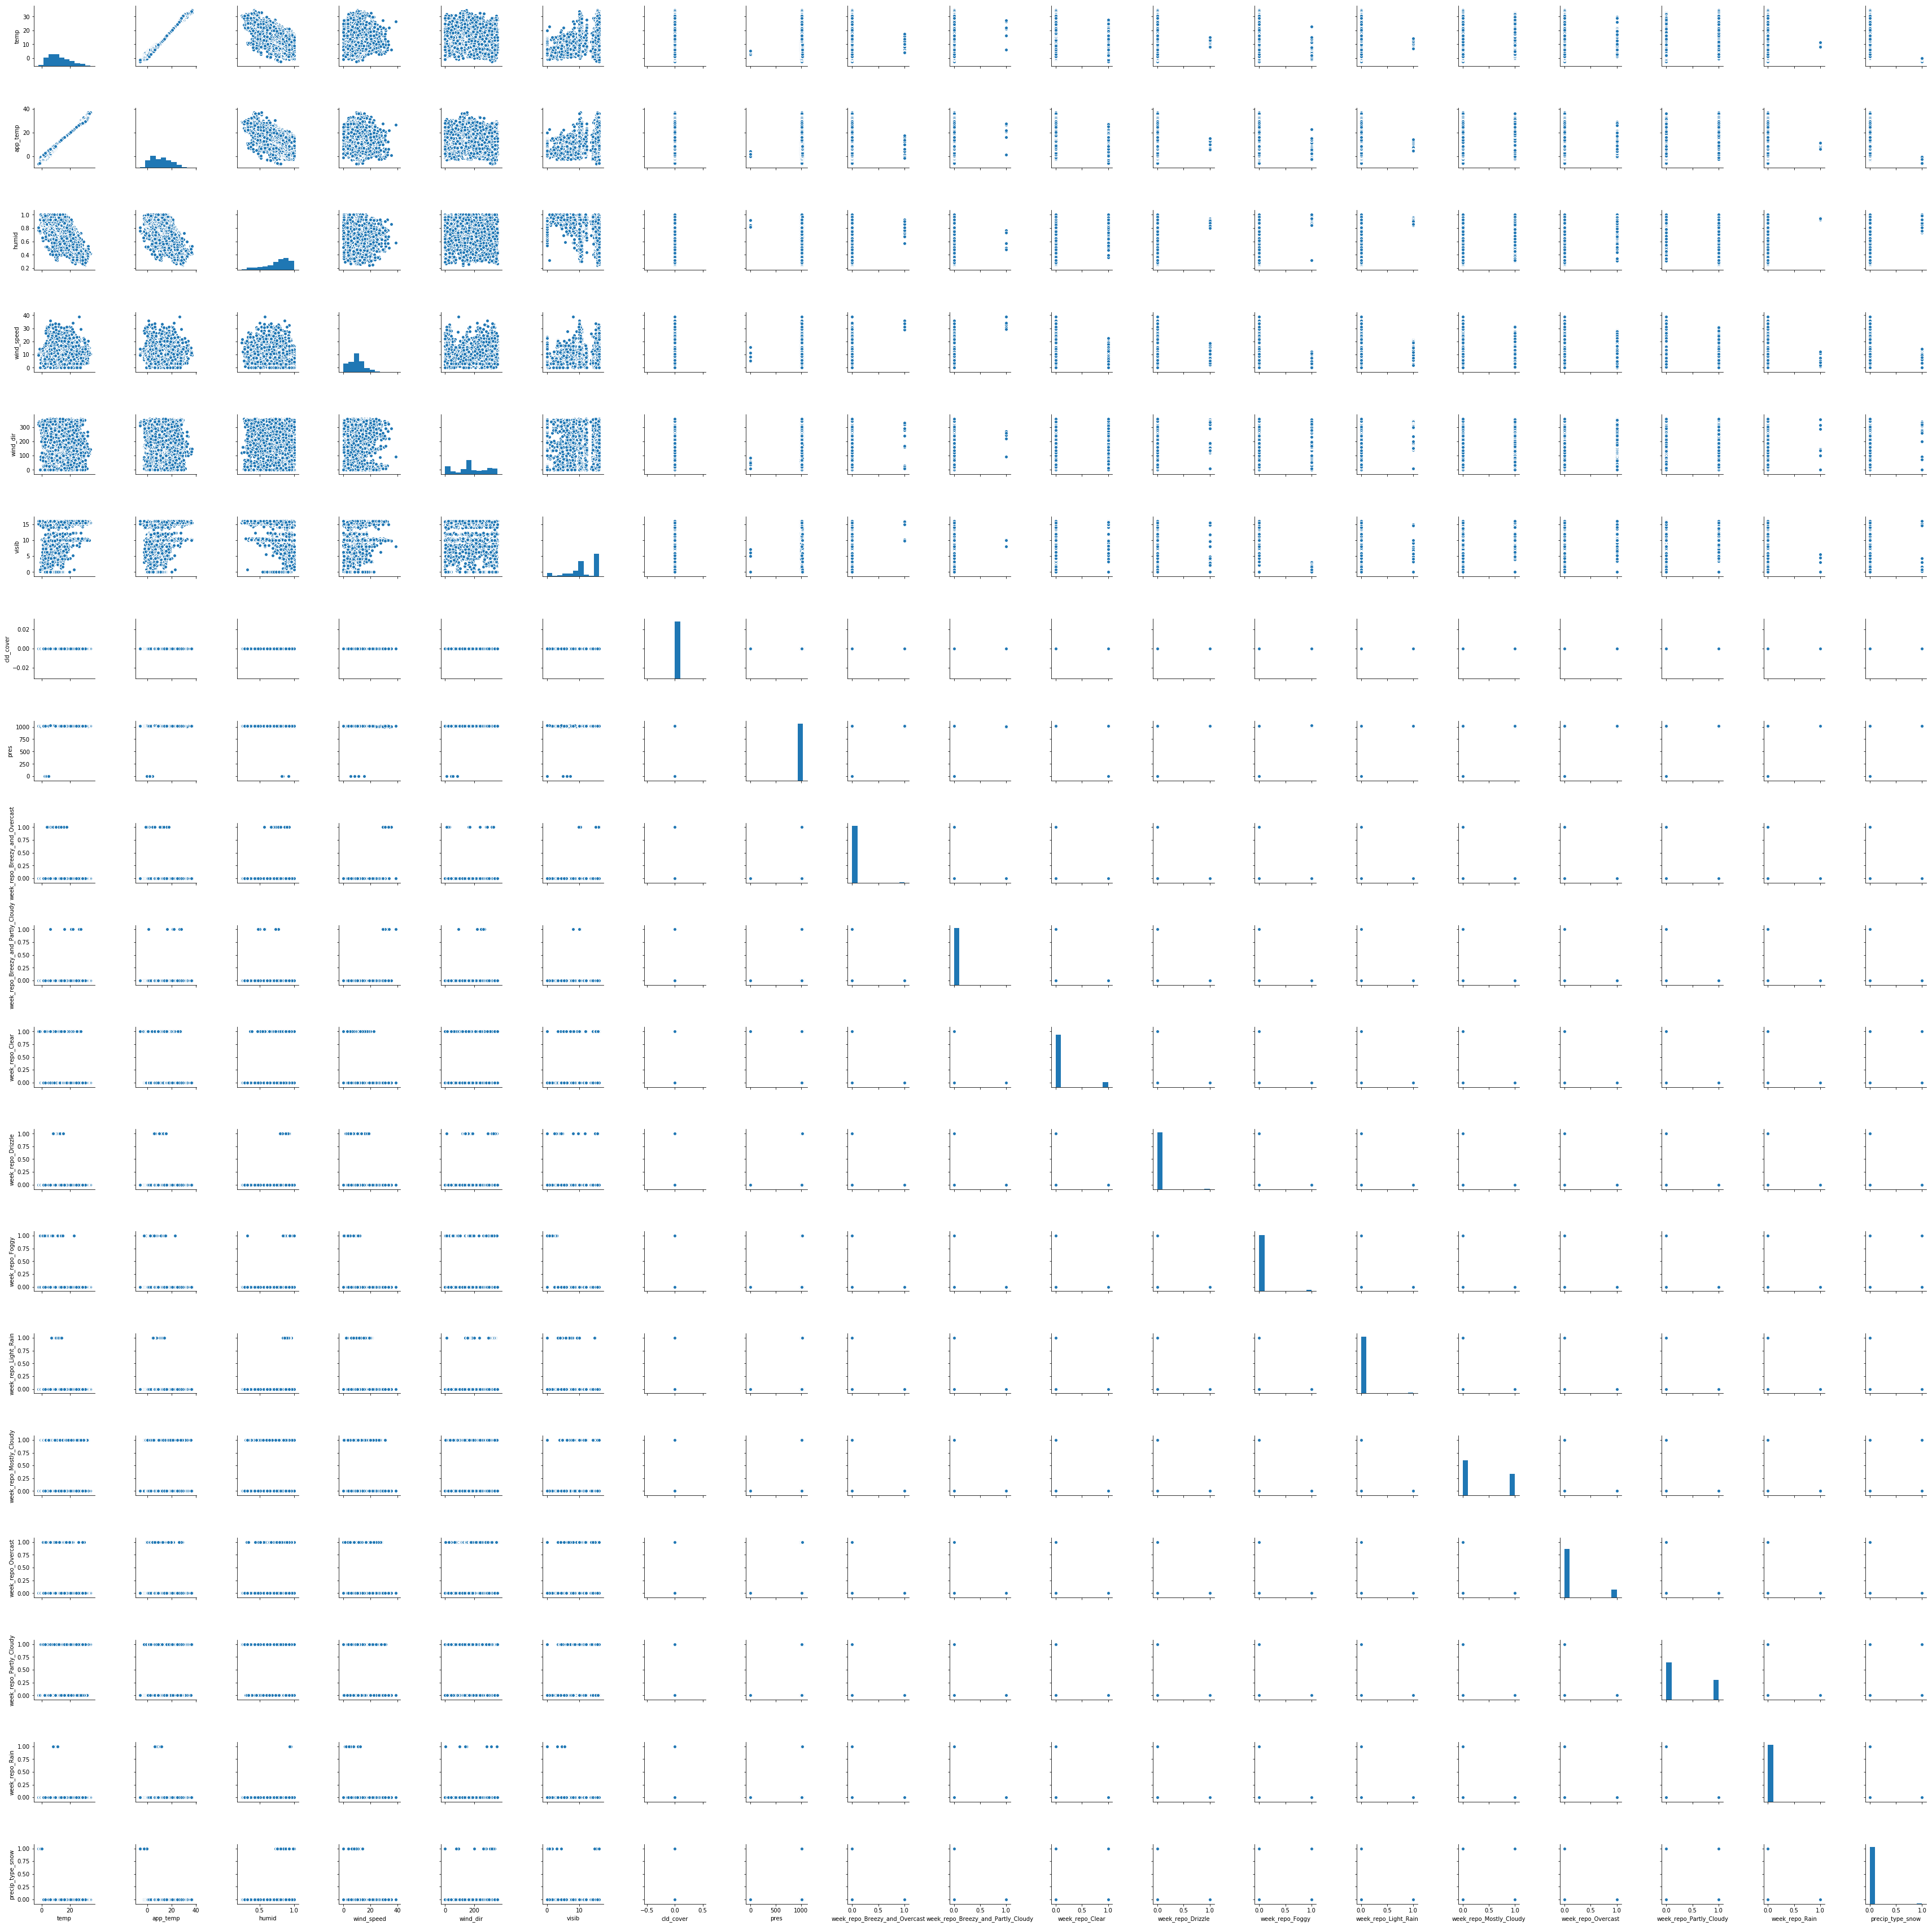

In [346]:
sns.pairplot(report_data)

C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


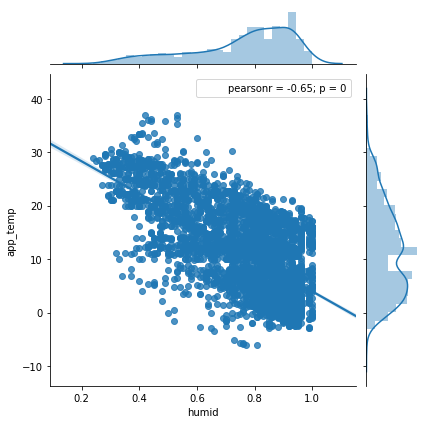

In [347]:
sns.jointplot(x="humid", y="app_temp", data=report_data, kind="reg")

C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


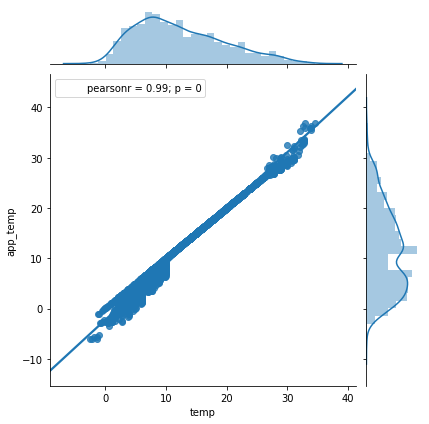

In [348]:
sns.jointplot(x="temp", y="app_temp", data=report_data, kind="reg")

C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


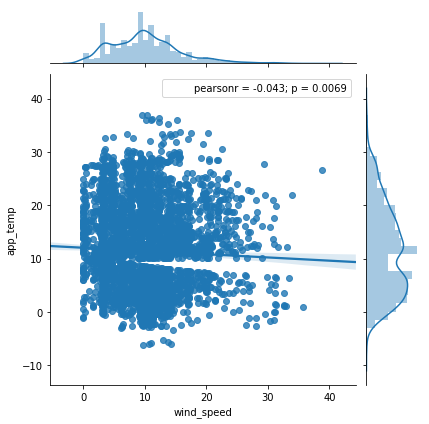

In [349]:
sns.jointplot(x="wind_speed", y="app_temp", data=report_data, kind="reg")

C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


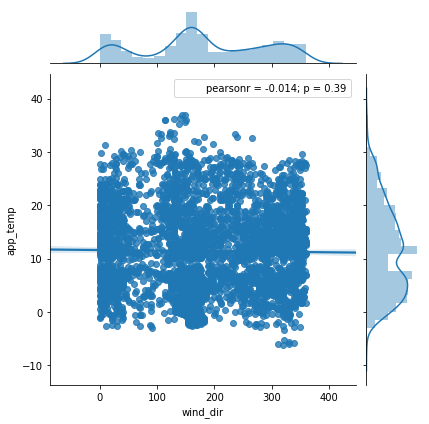

In [350]:
sns.jointplot(x="wind_dir", y="app_temp", data=report_data, kind="reg")

C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


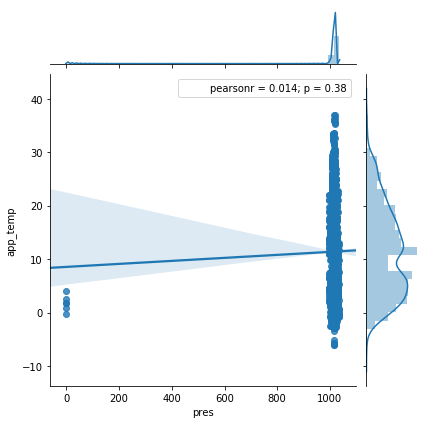

In [351]:
sns.jointplot(x="pres", y="app_temp", data=report_data, kind="reg")

C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


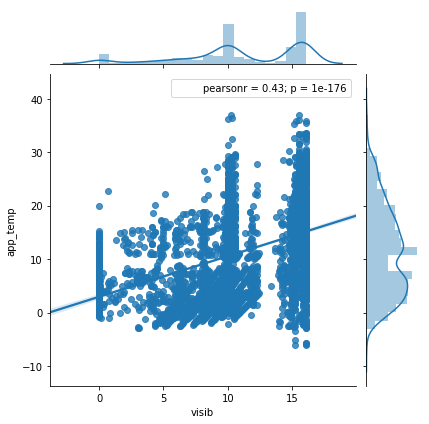

In [352]:
sns.jointplot(x="visib", y="app_temp", data=report_data, kind="reg")

# Heatmap For Continous Variables

               humid      temp  wind_speed  wind_dir      pres     visib
humid       1.000000 -0.676992   -0.182135  0.053938 -0.032173 -0.395970
temp       -0.676992  1.000000    0.001559 -0.020600  0.010880  0.429716
wind_speed -0.182135  0.001559    1.000000  0.027715 -0.020122 -0.046692
wind_dir    0.053938 -0.020600    0.027715  1.000000  0.036040 -0.040013
pres       -0.032173  0.010880   -0.020122  0.036040  1.000000  0.024045
visib      -0.395970  0.429716   -0.046692 -0.040013  0.024045  1.000000


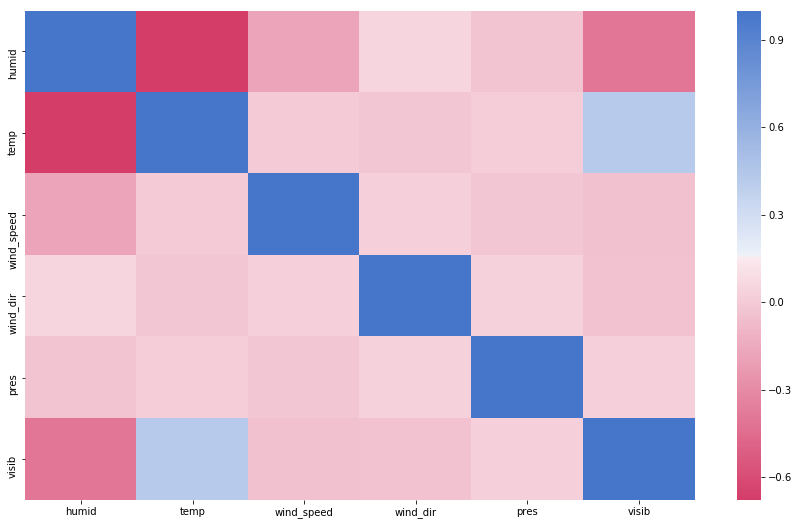

In [353]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = report_data[['humid', 'temp', 'wind_speed', 'wind_dir', 'pres', 'visib']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

In [354]:
report_data.corr()

,temp,app_temp,humid,wind_speed,wind_dir,visib,cld_cover,pres,week_repo_Breezy_and_Overcast,week_repo_Breezy_and_Partly_Cloudy,week_repo_Clear,week_repo_Drizzle,week_repo_Foggy,week_repo_Light_Rain,week_repo_Mostly_Cloudy,week_repo_Overcast,week_repo_Partly_Cloudy,week_repo_Rain,precip_type_snow
temp,1.000000,0.993535,-0.676992,0.001559,-0.020600,0.429716,NaN,0.010880,-0.024548,0.040470,-0.105339,-0.023320,-0.104563,-0.032392,0.029142,-0.068283,0.127729,-0.015177,-0.118848
app_temp,0.993535,1.000000,-0.654347,-0.042744,-0.013673,0.426675,NaN,0.013766,-0.035874,0.036742,-0.089541,-0.020614,-0.095902,-0.034828,0.020019,-0.060820,0.122100,-0.011026,-0.115991
humid,-0.676992,-0.654347,1.000000,-0.182135,0.053938,-0.395970,NaN,-0.032173,-0.000250,-0.033314,0.082609,0.068907,0.150741,0.088352,-0.083716,0.177356,-0.171933,0.054830,0.045655
wind_speed,0.001559,-0.042744,-0.182135,1.000000,0.027715,-0.046692,NaN,-0.020122,0.227180,0.150684,-0.185787,-0.006775,-0.091429,0.074313,0.099646,0.139333,-0.136003,-0.038539,-0.036980
wind_dir,-0.020600,-0.013673,0.053938,0.027715,1.000000,-0.040013,NaN,0.036040,0.007705,0.014127,0.031660,0.013395,-0.027161,0.045604,0.020784,-0.016597,-0.032533,0.015273,0.037657
visib,0.429716,0.426675,-0.395970,-0.046692,-0.040013,1.000000,NaN,0.024045,0.020748,-0.012024,-0.167236,-0.068809,-0.297898,-0.135165,0.034701,-0.034182,0.226545,-0.102381,-0.015371
cld_cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pres,0.010880,0.013766,-0.032173,-0.020122,0.036040,0.024045,NaN,1.000000,-0.002069,-0.009426,-0.088694,0.003600,0.010789,-0.002417,0.028111,-0.024323,0.038107,0.002796,0.002425
week_repo_Breezy_and_Overcast,-0.024548,-0.035874,-0.000250,0.227180,0.007705,0.020748,NaN,-0.002069,1.000000,-0.002378,-0.018519,-0.005681,-0.008876,-0.006617,-0.048032,-0.025215,-0.044231,-0.003071,-0.004008
week_repo_Breezy_and_Partly_Cloudy,0.040470,0.036742,-0.033314,0.150684,0.014127,-0.012024,NaN,-0.009426,-0.002378,1.000000,-0.011699,-0.003589,-0.005607,-0.004181,-0.030344,-0.015929,-0.027943,-0.001940,-0.002532


In [355]:
report_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 92453 to 96452
Data columns (total 19 columns):
temp                                  4000 non-null float64
app_temp                              4000 non-null float64
humid                                 4000 non-null float64
wind_speed                            4000 non-null float64
wind_dir                              4000 non-null int64
visib                                 4000 non-null float64
cld_cover                             4000 non-null int64
pres                                  4000 non-null float64
week_repo_Breezy_and_Overcast         4000 non-null uint8
week_repo_Breezy_and_Partly_Cloudy    4000 non-null uint8
week_repo_Clear                       4000 non-null uint8
week_repo_Drizzle                     4000 non-null uint8
week_repo_Foggy                       4000 non-null uint8
week_repo_Light_Rain                  4000 non-null uint8
week_repo_Mostly_Cloudy               4000 non-null uint8
week_r

# Linear Regression Score

In [356]:
report_model_1 = report_data.iloc[:, [0,4,7,12,14,18]].values
report_model_2 = report_data.iloc[:, [2,6,10,11,15,17]].values
report_model_3 = report_data.iloc[:, [3,5,9,8,13,16]].values
report_y = report_data.iloc[:, [1]].values

In [357]:
LinReg = LinearRegression(normalize= True)
LinReg.fit(report_model_1, report_y)
LinReg.score(report_model_1, report_y)

0.987301251535116

In [358]:
LinReg.fit(report_model_2, report_y)
LinReg.score(report_model_2, report_y)

0.43348217009095125

In [359]:
LinReg.fit(report_model_3, report_y)
LinReg.score(report_model_3, report_y)

0.18736239094283236

In [360]:
report_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 92453 to 96452
Data columns (total 19 columns):
temp                                  4000 non-null float64
app_temp                              4000 non-null float64
humid                                 4000 non-null float64
wind_speed                            4000 non-null float64
wind_dir                              4000 non-null int64
visib                                 4000 non-null float64
cld_cover                             4000 non-null int64
pres                                  4000 non-null float64
week_repo_Breezy_and_Overcast         4000 non-null uint8
week_repo_Breezy_and_Partly_Cloudy    4000 non-null uint8
week_repo_Clear                       4000 non-null uint8
week_repo_Drizzle                     4000 non-null uint8
week_repo_Foggy                       4000 non-null uint8
week_repo_Light_Rain                  4000 non-null uint8
week_repo_Mostly_Cloudy               4000 non-null uint8
week_r

In [361]:
from statsmodels.formula.api import ols

## Checking for p-value, f-stats, ChiSq for checking the if each model is siginificant, model assumpitions and model makes sense

In [362]:
model_X_1 = sm.ols('app_temp ~ temp + wind_speed + cld_cover + week_repo_Breezy_and_Partly_Cloudy + week_repo_Drizzle +  week_repo_Light_Rain + week_repo_Partly_Cloudy  ', report_data).fit()
model_X_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               app_temp   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 6.099e+04
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        23:14:54   Log-Likelihood:                -5001.8
No. Observations:                4000   AIC:                         1.002e+04
Df Residuals:                    3993   BIC:                         1.006e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.5734      0.037    -42.309      0.000      -1.646      -1.501
temp                                   1.1144      0.002    599.328      0.000       1.111       1.118
wind_speed                            -0.0656      0.002    -27.505      0.000      -0.070      -0.061
cld_cover                           2.832e-15    1.4e-15      2.018      0.044    8.03e-17    5.58e-15
week_repo_Breezy_and_Partly_Cloudy     0.6609      0.350      1.889      0.059      -0.025       1.347
week_repo_Drizzle                      0.1369      0.146      0.938      0.349      -0.149       0.423
week_repo_Light_Rain                   0.0004      0.126      0.003      0.997      -0.247       0.248
week_repo_Partly_Cloudy               -0.1900      0.029     -6.593      0.000      -0.247      -0.134
==============================================================================
Omnibus:                       48.709   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.616
Skew:                           0.042   Prob(JB):                     2.25e-07
Kurtosis:                       2.580   Cond. No.                     4.96e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.9e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [363]:
name = ['Jarque-Bera (JB)', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model_X_1.resid)
lzip(name, test)

[('Jarque-Bera (JB)', 30.615832941005916),
 ('Chi^2 two-tail prob.', 2.248310803940548e-07),
 ('Skew', 0.042079585002727446),
 ('Kurtosis', 2.5797474191036676)]

In [364]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(model_X_1.resid)
lzip(name, test)

[('Chi^2', 48.70948889303054),
 ('Two-tail probability', 2.6477006296601343e-11)]

In [365]:
name = ['F statistic', 'p-value']
np.linalg.cond(model_X_1.model.exog)
test = sms.het_goldfeldquandt(model_X_1.resid, model_X_1.model.exog)
lzip(name, test)

[('F statistic', 0.9720429696085958), ('p-value', 0.7366365180347664)]

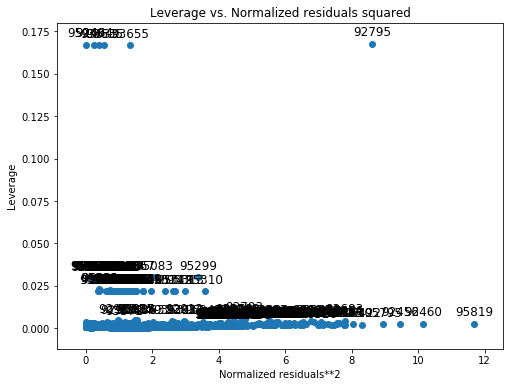

In [366]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model_X_1, ax = ax)

In [367]:
np.linalg.cond(model_X_1.model.exog)

4.960899543585935e+19

In [368]:
model_X_2 = sm.ols('app_temp ~ humid + wind_dir + visib + wind_speed + week_repo_Breezy_and_Overcast + week_repo_Clear + week_repo_Foggy  + precip_type_snow ', report_data).fit()
model_X_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               app_temp   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     488.4
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        23:14:58   Log-Likelihood:                -12694.
No. Observations:                4000   AIC:                         2.541e+04
Df Residuals:                    3991   BIC:                         2.546e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        30.7229      0.689     44.588      0.000      29.372      32.074
humid                           -28.3300      0.586    -48.329      0.000     -29.479     -27.181
wind_dir                          0.0029      0.001      3.275      0.001       0.001       0.005
visib                             0.3386      0.023     14.421      0.000       0.293       0.385
wind_speed                       -0.2100      0.017    -12.109      0.000      -0.244      -0.176
week_repo_Breezy_and_Overcast    -0.9345      1.543     -0.606      0.545      -3.959       2.090
week_repo_Clear                  -0.8121      0.346     -2.345      0.019      -1.491      -0.133
week_repo_Foggy                   3.0918      0.696      4.443      0.000       1.727       4.456
precip_type_snow                -12.3329      1.431     -8.619      0.000     -15.138      -9.527
==============================================================================
Omnibus:                       56.288   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.170
Skew:                           0.192   Prob(JB):                     9.43e-11
Kurtosis:                       2.640   Cond. No.                     3.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [369]:
name = ['Jarque-Bera (JB)', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model_X_2.resid)
lzip(name, test)

[('Jarque-Bera (JB)', 46.16961644052054),
 ('Chi^2 two-tail prob.', 9.427470327215336e-11),
 ('Skew', 0.19185021287950457),
 ('Kurtosis', 2.6397338734831175)]

In [370]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(model_X_2.resid)
lzip(name, test)

[('Chi^2', 56.288010750985805), ('Two-tail probability', 5.98706215428216e-13)]

In [371]:
name = ['F statistic', 'p-value']
np.linalg.cond(model_X_2.model.exog)
test = sms.het_goldfeldquandt(model_X_2.resid, model_X_2.model.exog)
lzip(name, test)

[('F statistic', 0.621656055450442), ('p-value', 0.9999999999999999)]

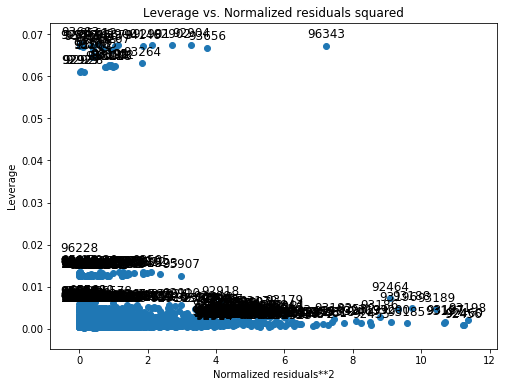

In [372]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model_X_2, ax = ax)

In [373]:
np.linalg.cond(model_X_2.model.exog)

3523.261203479654

In [374]:
model_X_3 = sm.ols('app_temp ~ wind_speed + wind_dir + pres + visib + cld_cover + week_repo_Overcast + week_repo_Clear + week_repo_Foggy  + precip_type_snow + week_repo_Breezy_and_Overcast +  week_repo_Light_Rain  + week_repo_Rain ', report_data).fit()
model_X_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               app_temp   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     92.15
Date:                Mon, 19 Nov 2018   Prob (F-statistic):          7.67e-187
Time:                        23:15:05   Log-Likelihood:                -13607.
No. Observations:                4000   AIC:                         2.724e+04
Df Residuals:                    3988   BIC:                         2.731e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.7892      2.992      0.932      0.351      -3.077       8.655
wind_speed                       -0.0118      0.021     -0.552      0.581      -0.054       0.030
wind_dir                          0.0007      0.001      0.604      0.546      -0.002       0.003
pres                           5.563e-08      0.003   1.91e-05      1.000      -0.006       0.006
visib                             0.7907      0.028     28.496      0.000       0.736       0.845
cld_cover                     -8.016e-15   1.68e-15     -4.780      0.000   -1.13e-14   -4.73e-15
week_repo_Overcast               -1.0528      0.335     -3.144      0.002      -1.709      -0.396
week_repo_Clear                  -0.3731      0.441     -0.846      0.398      -1.238       0.492
week_repo_Foggy                   2.9115      0.880      3.310      0.001       1.187       4.636
precip_type_snow                -14.7404      1.797     -8.202      0.000     -18.264     -11.217
week_repo_Breezy_and_Overcast    -5.9080      1.938     -3.049      0.002      -9.707      -2.109
week_repo_Light_Rain              1.7373      1.098      1.582      0.114      -0.415       3.890
week_repo_Rain                    5.3384      2.324      2.297      0.022       0.782       9.895
==============================================================================
Omnibus:                      135.446   Durbin-Watson:                   0.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.550
Skew:                           0.272   Prob(JB):                     1.79e-21
Kurtosis:                       2.473   Cond. No.                     1.44e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [375]:
name = ['Jarque-Bera (JB)', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model_X_3.resid)
lzip(name, test)

[('Jarque-Bera (JB)', 95.54963540959724),
 ('Chi^2 two-tail prob.', 1.7850907389340946e-21),
 ('Skew', 0.2718966304200657),
 ('Kurtosis', 2.473135024961385)]

In [376]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(model_X_3.resid)
lzip(name, test)

[('Chi^2', 135.44582736298642),
 ('Two-tail probability', 3.875362118319948e-30)]

In [377]:
name = ['F statistic', 'p-value']
np.linalg.cond(model_X_3.model.exog)
test = sms.het_goldfeldquandt(model_X_3.resid, model_X_3.model.exog)
lzip(name, test)

[('F statistic', 0.8106105462428531), ('p-value', 0.999998550463048)]

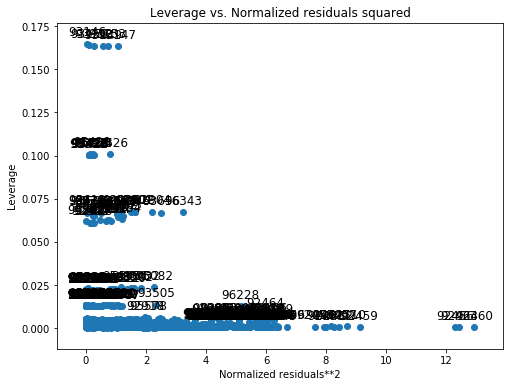

In [378]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model_X_3, ax = ax)

In [379]:
np.linalg.cond(model_X_3.model.exog)

1.4390626236788417e+20

# Cross-validation of each model

In [380]:
cols_to_use = ["temp", "wind_speed", "cld_cover", "week_repo_Breezy_and_Partly_Cloudy", "week_repo_Drizzle", "week_repo_Light_Rain", "week_repo_Partly_Cloudy"]
X1 = report_data[cols_to_use]
y = report_data.app_temp

In [381]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [382]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X1, y, scoring='neg_mean_absolute_error')
print(scores)

[-0.21269532 -0.06084959 -0.09718096]


In [383]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 0.123575


In [384]:
from sklearn.model_selection import KFold
from sklearn import metrics

kf = KFold(n_splits=5)
kf.get_n_splits(report_model_1)

5

In [385]:
for train,test in kf.split(report_model_1):
    print (train)
    print (test)

[ 800  801  802 ... 3997 3998 3999]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [386]:
scores = []
for train, test in kf.split(report_model_1):
    LinReg.fit(report_model_1[train],report_y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(report_y[test], LinReg.predict(report_model_1[test]))))
scores

[1.2533887557427794,
 0.8352615504182297,
 0.9169502477420464,
 0.9446509861898674,
 1.0428718819776852]

In [387]:
np.mean(scores)

0.9986246844141216

In [388]:
np.median(scores)

0.9446509861898674

In [389]:
np.std(scores)

0.14362028671942267

In [390]:
rmse = np.sqrt(model_X_1.mse_resid)
rmse

0.8456854733650432

In [391]:
cols_to_use = ["humid", "wind_dir", "visib", "wind_speed", "week_repo_Breezy_and_Overcast", "week_repo_Clear",  "week_repo_Foggy", "precip_type_snow"]
X2 = report_data[cols_to_use]
y = report_data.app_temp

In [392]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [393]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X2, y, scoring='neg_mean_absolute_error')
print(scores)

[-6.93828752 -6.02755995 -4.98721931]


In [394]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 5.984356


In [395]:
from sklearn.model_selection import KFold
from sklearn import metrics

kf = KFold(n_splits=5)
kf.get_n_splits(report_model_2)

5

In [396]:
for train,test in kf.split(report_model_2):
    print (train)
    print (test)

[ 800  801  802 ... 3997 3998 3999]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [397]:
scores = []
for train, test in kf.split(report_model_2):
    LinReg.fit(report_model_2[train],report_y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(report_y[test], LinReg.predict(report_model_2[test]))))
scores

[9.024829392199532,
 5.107201918699565,
 6.8757373108601785,
 4.77513029435713,
 7.128721414583063]

In [398]:
np.mean(scores)

6.582324066139894

In [399]:
np.median(scores)

6.8757373108601785

In [400]:
np.std(scores)

1.5357348951581513

In [401]:
rmse = np.sqrt(model_X_2.mse_resid)
rmse

5.788009728396503

In [402]:
cols_to_use = ["wind_speed", "wind_dir","pres", "visib", "cld_cover", "week_repo_Overcast", "week_repo_Clear", "week_repo_Foggy", "precip_type_snow", "week_repo_Breezy_and_Overcast", "week_repo_Light_Rain", "week_repo_Rain"]
X3 = report_data[cols_to_use]
y = report_data.app_temp

In [403]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [404]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X3, y, scoring='neg_mean_absolute_error')
print(scores)

[-7.52242004 -6.86955989 -6.26564558]


In [405]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 6.885875


In [406]:
from sklearn.model_selection import KFold
from sklearn import metrics

In [407]:
kf = KFold(n_splits=5)
kf.get_n_splits(report_model_3)

5

In [408]:
for train,test in kf.split(report_model_3):
    print (train)
    print (test)

[ 800  801  802 ... 3997 3998 3999]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [409]:
scores = []
for train, test in kf.split(report_model_3):
    LinReg.fit(report_model_3[train],report_y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(report_y[test], LinReg.predict(report_model_3[test]))))
scores

[9.338643643245609,
 6.766237225685549,
 8.34014651772655,
 6.1090744284523035,
 8.471490888986418]

In [410]:
np.mean(scores)

7.805118540819285

In [411]:
np.median(scores)

8.34014651772655

In [412]:
np.std(scores)

1.18641024104444

In [413]:
rmse = np.sqrt(model_X_3.mse_resid)
rmse

7.273192679203985

# Compare AIC, BIC and RSq Adj

In [414]:
print(model_X_1.aic)
print(model_X_2.aic)
print(model_X_3.aic)

10017.639978314572
25406.806041864667
27237.053055304743


In [415]:
print(model_X_1.bic)
print(model_X_2.bic)
print(model_X_3.bic)

10061.698325795285
25463.452488625586
27312.58165098597


In [416]:
print(model_X_1.rsquared_adj)
print(model_X_2.rsquared_adj)
print(model_X_3.rsquared_adj)

0.9891905732043115
0.49365861142465195
0.20046936431234086


# Multi-Colinearity

In [417]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [418]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X1, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X1)
        return self

    def transform(self, X1, y=None):
        print('ReduceVIF transform')
        columns = X1.columns.tolist()
        if hasattr(self, 'imputer'):
            X1 = pd.DataFrame(self.imputer.transform(X1), columns=columns)
        return ReduceVIF.calculate_vif(X1, self.thresh)

    @staticmethod
    def calculate_vif(X1, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X1.columns
            dropped = False
            vif = [variance_inflation_factor(X1[variables].values, X1.columns.get_loc(var)) for var in X1.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                X1 = X1.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X1

In [419]:
transformer = ReduceVIF()

X1 = transformer.fit_transform(X1[X1.columns[:]], y)

X1.head()

ReduceVIF fit
ReduceVIF transform


,temp,wind_speed,cld_cover,week_repo_Breezy_and_Partly_Cloudy,week_repo_Drizzle,week_repo_Light_Rain,week_repo_Partly_Cloudy
0,27.633333,3.3488,0.0,0.0,0.0,0.0,1.0
1,29.905556,8.0178,0.0,0.0,0.0,0.0,1.0
2,32.083333,13.7011,0.0,0.0,0.0,0.0,1.0
3,32.633333,12.3487,0.0,0.0,0.0,0.0,1.0
4,33.650000,15.2789,0.0,0.0,0.0,0.0,1.0


In [420]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X2, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X2)
        return self

    def transform(self, X2, y=None):
        print('ReduceVIF transform')
        columns = X2.columns.tolist()
        if hasattr(self, 'imputer'):
            X2 = pd.DataFrame(self.imputer.transform(X2), columns=columns)
        return ReduceVIF.calculate_vif(X2, self.thresh)

    @staticmethod
    def calculate_vif(X2, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X2.columns
            dropped = False
            vif = [variance_inflation_factor(X2[variables].values, X2.columns.get_loc(var)) for var in X2.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                X2 = X2.drop([X2.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X2

In [421]:
transformer = ReduceVIF()

X2 = transformer.fit_transform(X2[X2.columns[:]], y)

X2.head()

ReduceVIF fit
ReduceVIF transform


,wind_dir,visib,wind_speed,week_repo_Breezy_and_Overcast,week_repo_Clear,week_repo_Foggy,precip_type_snow
0,37.0,14.7315,3.3488,0.0,0.0,0.0,0.0
1,107.0,15.1340,8.0178,0.0,0.0,0.0,0.0
2,138.0,15.1340,13.7011,0.0,0.0,0.0,0.0
3,140.0,10.3523,12.3487,0.0,0.0,0.0,0.0
4,151.0,15.3111,15.2789,0.0,0.0,0.0,0.0


In [422]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X3, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X3)
        return self

    def transform(self, X3, y=None):
        print('ReduceVIF transform')
        columns = X3.columns.tolist()
        if hasattr(self, 'imputer'):
            X3 = pd.DataFrame(self.imputer.transform(X3), columns=columns)
        return ReduceVIF.calculate_vif(X3, self.thresh)

    @staticmethod
    def calculate_vif(X3, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X3.columns
            dropped = False
            vif = [variance_inflation_factor(X3[variables].values, X3.columns.get_loc(var)) for var in X3.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                X3 = X3.drop([X3.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X3

In [423]:
transformer = ReduceVIF()

X3 = transformer.fit_transform(X3[X3.columns[:]], y)

X3.head()

ReduceVIF fit
ReduceVIF transform


,wind_speed,wind_dir,visib,cld_cover,week_repo_Overcast,week_repo_Clear,week_repo_Foggy,precip_type_snow,week_repo_Breezy_and_Overcast,week_repo_Light_Rain,week_repo_Rain
0,3.3488,37.0,14.7315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0178,107.0,15.1340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.7011,138.0,15.1340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.3487,140.0,10.3523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.2789,151.0,15.3111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cross-validate the model

In [424]:
result = pd.merge(x1, y1, on="index")

In [425]:
y1 = y.reset_index()
x1 = X1.reset_index()

In [428]:
model_1 = X1.iloc[:,:].values

In [429]:
from sklearn.model_selection import KFold
from sklearn import metrics

In [430]:
kf = KFold(n_splits=5)
kf.get_n_splits(model_1)

5

In [431]:
for train,test in kf.split(model_1):
    print (train)
    print (test)

[ 800  801  802 ... 3997 3998 3999]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [432]:
scores = []
for train, test in kf.split(model_1):
    LinReg.fit(model_1[train],report_y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(report_y[test], LinReg.predict(model_1[test]))))
scores

[0.9982354364231684,
 0.8659411107750931,
 0.8748695139433784,
 0.8976653263427543,
 1.0129283130566082]

In [433]:
np.mean(scores)

0.9299279401082003

In [434]:
np.median(scores)

0.8976653263427543

In [435]:
np.std(scores)

0.06280381649107618

In [436]:
rmse = np.sqrt(model_x_1.mse_resid)
rmse

0.8456854733650432

In [437]:
model_2 = X2.iloc[:,:].values

In [438]:
from sklearn.model_selection import KFold
from sklearn import metrics

In [439]:
kf = KFold(n_splits=5)
kf.get_n_splits(model_2)

5

In [440]:
for train,test in kf.split(model_2):
    print (train)
    print (test)

[ 800  801  802 ... 3997 3998 3999]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [441]:
scores = []
for train, test in kf.split(model_2):
    LinReg.fit(model_2[train],report_y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(report_y[test], LinReg.predict(model_2[test]))))
scores

[9.273894941299744,
 6.774782830659432,
 8.427277287763465,
 6.262976774570095,
 8.442548915582595]

In [442]:
np.mean(scores)

7.836296149975067

In [443]:
np.median(scores)

8.427277287763465

In [444]:
np.std(scores)

1.1301005079156283

In [445]:
rmse = np.sqrt(model_X_2.mse_resid)
rmse

5.788009728396503

In [446]:
model_3 = X3.iloc[:,:].values

In [447]:
from sklearn.model_selection import KFold
from sklearn import metrics

In [448]:
kf = KFold(n_splits=5)
kf.get_n_splits(model_3)

5

In [449]:
for train,test in kf.split(model_3):
    print (train)
    print (test)

[ 800  801  802 ... 3997 3998 3999]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [450]:
scores = []
for train, test in kf.split(model_3):
    LinReg.fit(model_3[train],report_y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(report_y[test], LinReg.predict(model_3[test]))))
scores

[9.288451412505466,
 6.783995616653608,
 8.973744498122208,
 6.218645464984262,
 8.420704159287462]

In [451]:
np.mean(scores)

7.937108230310602

In [452]:
np.median(scores)

8.420704159287462

In [453]:
np.std(scores)

1.2179812105215602

In [454]:
rmse = np.sqrt(model_X_3.mse_resid)
rmse

7.273192679203985

# Interaction Effect

In [455]:
report_data["sum"] = report_data["wind_dir"] * report_data.wind_speed
report_data.head()

,temp,app_temp,humid,wind_speed,wind_dir,visib,cld_cover,pres,week_repo_Breezy_and_Overcast,week_repo_Breezy_and_Partly_Cloudy,week_repo_Clear,week_repo_Drizzle,week_repo_Foggy,week_repo_Light_Rain,week_repo_Mostly_Cloudy,week_repo_Overcast,week_repo_Partly_Cloudy,week_repo_Rain,precip_type_snow,sum
92453,27.633333,30.161111,0.72,3.3488,37,14.7315,0,1019.15,0,0,0,0,0,0,0,0,1,0,0,123.9056
92454,29.905556,32.600000,0.60,8.0178,107,15.1340,0,1019.12,0,0,0,0,0,0,0,0,1,0,0,857.9046
92455,32.083333,35.233333,0.53,13.7011,138,15.1340,0,1019.09,0,0,0,0,0,0,0,0,1,0,0,1890.7518
92456,32.633333,36.394444,0.53,12.3487,140,10.3523,0,1018.96,0,0,0,0,0,0,0,0,1,0,0,1728.8180
92457,33.650000,35.888889,0.44,15.2789,151,15.3111,0,1018.49,0,0,0,0,0,0,0,0,1,0,0,2307.1139


In [456]:
inter = sm.ols('app_temp ~ wind_dir + visib + wind_speed + week_repo_Breezy_and_Overcast + week_repo_Clear + week_repo_Foggy  + precip_type_snow + sum', report_data).fit()
inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               app_temp   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     127.4
Date:                Mon, 19 Nov 2018   Prob (F-statistic):          9.07e-191
Time:                        23:22:54   Log-Likelihood:                -13605.
No. Observations:                4000   AIC:                         2.723e+04
Df Residuals:                    3991   BIC:                         2.728e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         4.1920      0.554      7.562      0.000       3.105       5.279
wind_dir                         -0.0073      0.002     -3.581      0.000      -0.011      -0.003
visib                             0.7893      0.027     29.048      0.000       0.736       0.843
wind_speed                       -0.1638      0.037     -4.437      0.000      -0.236      -0.091
week_repo_Breezy_and_Overcast    -5.9040      1.934     -3.052      0.002      -9.696      -2.112
week_repo_Clear                  -0.2850      0.435     -0.656      0.512      -1.137       0.567
week_repo_Foggy                   2.9550      0.874      3.382      0.001       1.242       4.668
precip_type_snow                -14.8251      1.796     -8.256      0.000     -18.346     -11.304
sum                               0.0008      0.000      4.737      0.000       0.000       0.001
==============================================================================
Omnibus:                      128.662   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.674
Skew:                           0.300   Prob(JB):                     2.27e-22
Kurtosis:                       2.511   Cond. No.                     4.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [457]:
cols_to_use = ["wind_dir", "visib", "wind_speed", "week_repo_Breezy_and_Overcast", "week_repo_Clear",  "week_repo_Foggy", "precip_type_snow"]
X = report_data[cols_to_use]
y = report_data.app_temp

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train

(       wind_dir    visib  wind_speed  week_repo_Breezy_and_Overcast  \
 95449         6   0.0000     13.4757                              0   
 95748        67  16.1000      4.6368                              0   
 94737       184  10.6421     14.1197                              0   
 95246       146   9.9820     11.8174                              0   
 93240       350   7.9695     13.9909                              0   
 94499       174   9.6922     12.4453                              0   
 93192       339  16.1000     11.0768                              0   
 94602       164   9.5795      9.1287                              0   
 95822       155  10.5777      9.3702                              0   
 95945       225  15.3111      6.6332                              0   
 95173         2   4.9588      8.5652                              0   
 93725       266   9.9820      5.1359                              0   
 94950       163   9.5795     12.6546                           

In [459]:
LinReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [460]:
r_square = LinReg.score(X, y)
r_square

0.1989375297884013